<a href="https://colab.research.google.com/github/anirbanghoshsbi/.github.io/blob/master/Hidden_Markov_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install hmmlearn
!pip install yfinance

In [ ]:
from hmmlearn import hmm
import yfinance as yf

In [ ]:
df = yf.download('^NSEI',period='max')#start='2015-01-01'

[*********************100%***********************]  1 of 1 completed


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(1)

In [ ]:
df.head(1)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2007-09-17,4518.450195,4549.049805,4482.850098,4494.649902,4494.649902,0


In [ ]:
returns = np.log(df['Close']).diff(8)

In [ ]:
returns.dropna(inplace=True)

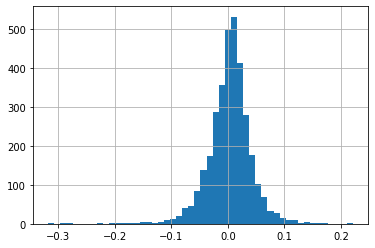

In [ ]:
returns.hist(bins=50);

In [ ]:
model = hmm.GaussianHMM(n_components=2, covariance_type="diag")

In [ ]:
#retu = np.column_stack([returns]) ===== returns.to_numpy().reshape(-1, 1)


In [ ]:
X = returns.to_numpy().reshape(-1, 1)
print(X.shape)
model.fit(X)

(3383, 1)


GaussianHMM(algorithm='viterbi', covariance_type='diag', covars_prior=0.01,
            covars_weight=1, init_params='stmc', means_prior=0, means_weight=0,
            min_covar=0.001, n_components=2, n_iter=10, params='stmc',
            random_state=None, startprob_prior=1.0, tol=0.01,
            transmat_prior=1.0, verbose=False)

In [ ]:
Z = model.predict(X)

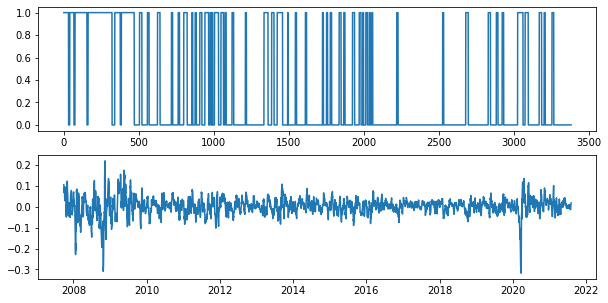

In [ ]:
fig, ax = plt.subplots(figsize=(10, 5))
plt.subplot(211)
plt.plot(Z)
plt.subplot(212)
plt.plot(returns);

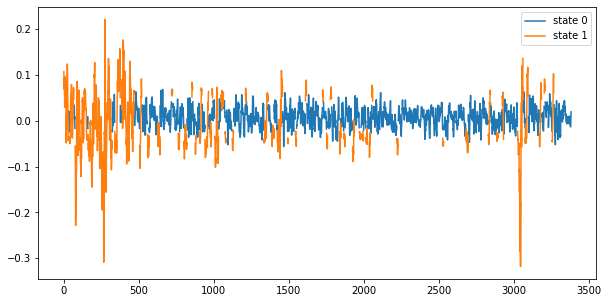

In [ ]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();

In [ ]:
# transition matrix
model.transmat_

array([[0.96165903, 0.03834097],
       [0.08608384, 0.91391616]])

In [ ]:
'''
# try to set the transition matrix intuitively
model.transmat_ = np.array([
  [0.999, 0.001],
  [0.001, 0.999],                           
])
'''

'\n# try to set the transition matrix intuitively\nmodel.transmat_ = np.array([\n  [0.999, 0.001],\n  [0.001, 0.999],                           \n])\n'

In [ ]:
# run inference again
Z = model.predict(X)
ret=returns.reset_index()
zi= pd.concat([ret.Date,pd.Series(Z)],axis=1)
zi=zi.set_index('Date')
zi.columns=['pred']



In [ ]:
def plot_buy_sell_signal(df):
  reg1=[]
  reg2=[]
  for i in range(len(df)):
    if df.pred.iloc[i]==1 and df.pred.iloc[i-1]==0 :
      reg1.append(i)
    elif df.pred.iloc[i]==0 and df.pred.iloc[i-1]==1 :
      reg2.append(i)
  
  return reg1,reg2

In [ ]:
sell,buy=plot_buy_sell_signal(zi)

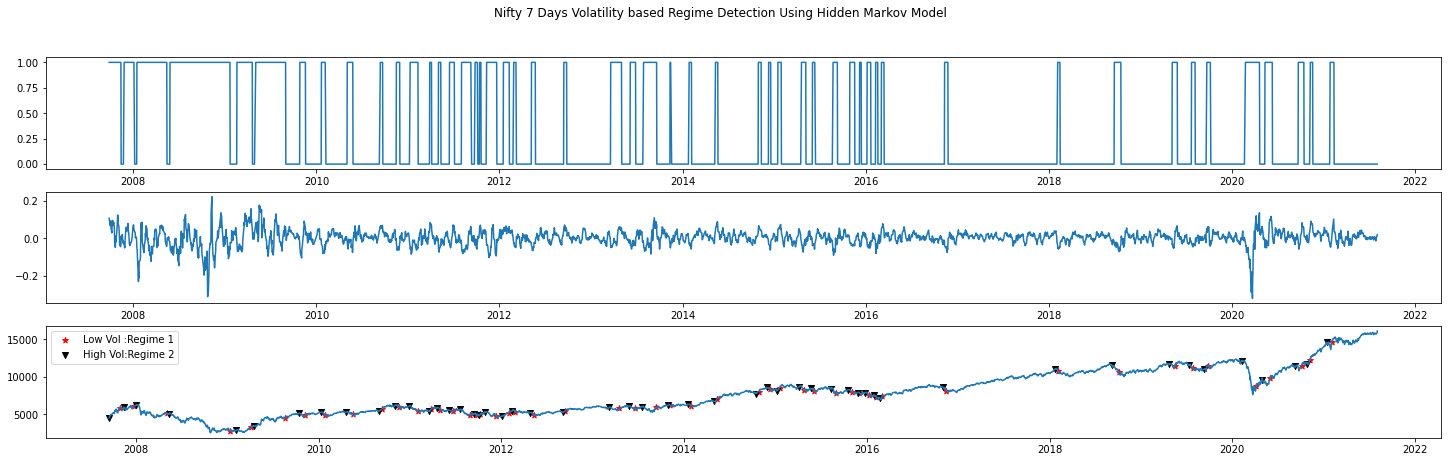

In [ ]:
fig, ax = plt.subplots(figsize=(25,7),sharex=True)
plt.subplot(311)
plt.plot(zi[:])
plt.subplot(312)
plt.plot(returns[:])
plt.subplot(313)
plt.plot(df['Close'][:])
plt.scatter(df.iloc[buy][:].index,df.iloc[buy][:].Close,marker='*',color='r',label='Low Vol :Regime 1')
plt.scatter(df.iloc[sell][:].index,df.iloc[sell][:].Close,marker='v',color='black',label='High Vol:Regime 2')
plt.legend()
plt.suptitle('Nifty 7 Days Volatility based Regime Detection Using Hidden Markov Model')
plt.show();

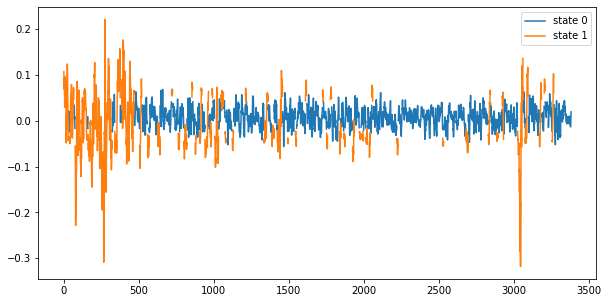

In [ ]:
# we want to draw different segments in different colors according to state
fig, ax = plt.subplots(figsize=(10, 5))

# first create arrays with nan
returns0 = np.empty(len(Z))
returns1 = np.empty(len(Z))
returns0[:] = np.nan
returns1[:] = np.nan

# fill in the values only if the state is the one corresponding to the array
returns0[Z == 0] = returns[Z == 0]
returns1[Z == 1] = returns[Z == 1]
plt.plot(returns0, label='state 0')
plt.plot(returns1, label='state 1')
plt.legend();